<a href="https://colab.research.google.com/github/vaibhav-garg1503/codeclause_Golden_project_Breast_cancer_prediction/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# # Load the dataset
# from google.colab import files
# uploaded = files.upload()

In [14]:
df = pd.read_csv('data.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [15]:
# count the number of rows and columns in dataset:
df.shape

(569, 33)

In [16]:
# count the number of empty values in each columns:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [17]:
# drop the columns with all the missing values:
df = df.dropna(axis = 1)

In [18]:
df.shape

(569, 32)

In [19]:
# Get the count of the number of Malognant(M) or Benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [21]:
# look at the data types to see which columns need to be encoded:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [22]:
# Rename the dagnosis data to labels:
df = df.rename(columns = {'diagnosis' : 'label'})
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [23]:
# define the dependent variable that need to predict(label)
y = df['label'].values
print(np.unique(y))

['B' 'M']


In [24]:
# Encoding categorical data from text(B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M = 1 and B = 0
print(np.unique(Y))

[0 1]


In [25]:
# define x and normalize / scale value:

# define the independent variables, Drop label and ID , and normalize other data:
X  = df.drop(labels=['label','id'],axis = 1)

#scale / normalize the values to bring them into similar range:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

print(X)



[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [26]:
# Split data into training and testing data to verify accuracy after fitting the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state=42)
print('Shape of training data is: ', x_train.shape)
print('Shape of testing data is: ', x_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


In [27]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [28]:
model = Sequential()
model.add(Dense(128, input_dim=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 12,289
Trainable params: 12,289
Non-traina

In [30]:
# fit with no early stopping or other callbacks:
history = model.fit(x_train,y_train,verbose = 1,epochs = 100, batch_size = 64,validation_data = (x_test,y_test))

Epoch 1/100
7/7 [==============================] - 1s 45ms/step - loss: 0.7074 - accuracy: 0.5587 - val_loss: 0.6768 - val_accuracy: 0.6294
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6692 - accuracy: 0.6502 - val_loss: 0.6381 - val_accuracy: 0.8811
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6310 - accuracy: 0.7066 - val_loss: 0.5964 - val_accuracy: 0.9301
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6129 - accuracy: 0.7394 - val_loss: 0.5465 - val_accuracy: 0.9301
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5634 - accuracy: 0.8028 - val_loss: 0.4890 - val_accuracy: 0.9301
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.5304 - accuracy: 0.8169 - val_loss: 0.4275 - val_accuracy: 0.9301
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.4687 - accuracy: 0.8545 - val_loss: 0.3649 - val_accuracy: 0.9371
Epoch 8/100
7/7 [======

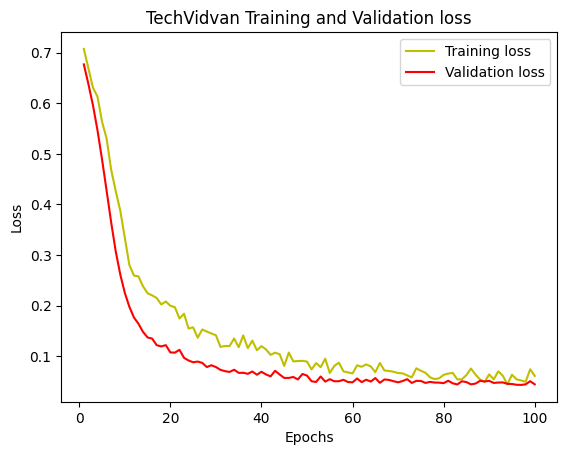

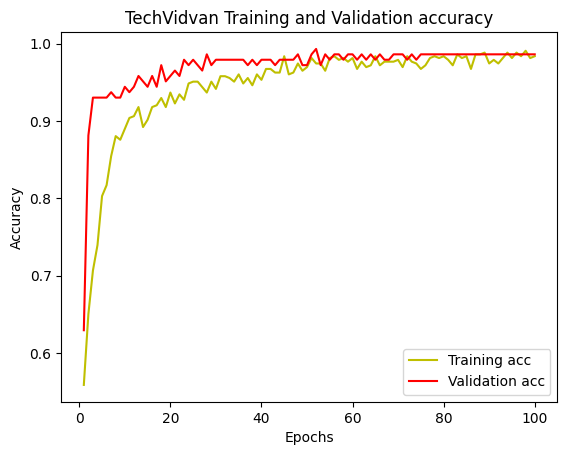

In [31]:
# plot the training and validation accuracy and loss at each epochs:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('TechVidvan Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs,val_acc,'r',label = 'Validation acc')
plt.title('TechVidvan Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



5/5 [==============================] - 0s 4ms/step


<Axes: >

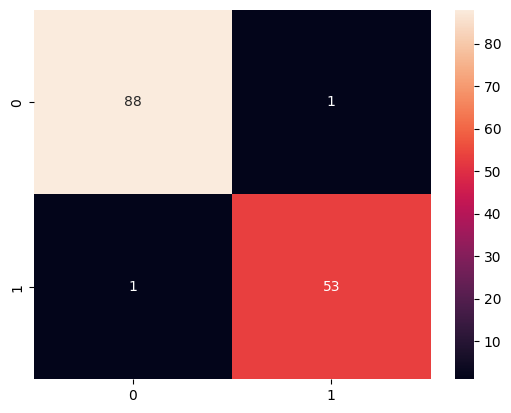

In [32]:
# Predicting the Test set results:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True)